/tmp/ipykernel_54075/3761982688.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PC1'] = components[:, 0]
/tmp/ipykernel_54075/3761982688.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PC2'] = components[:, 1]


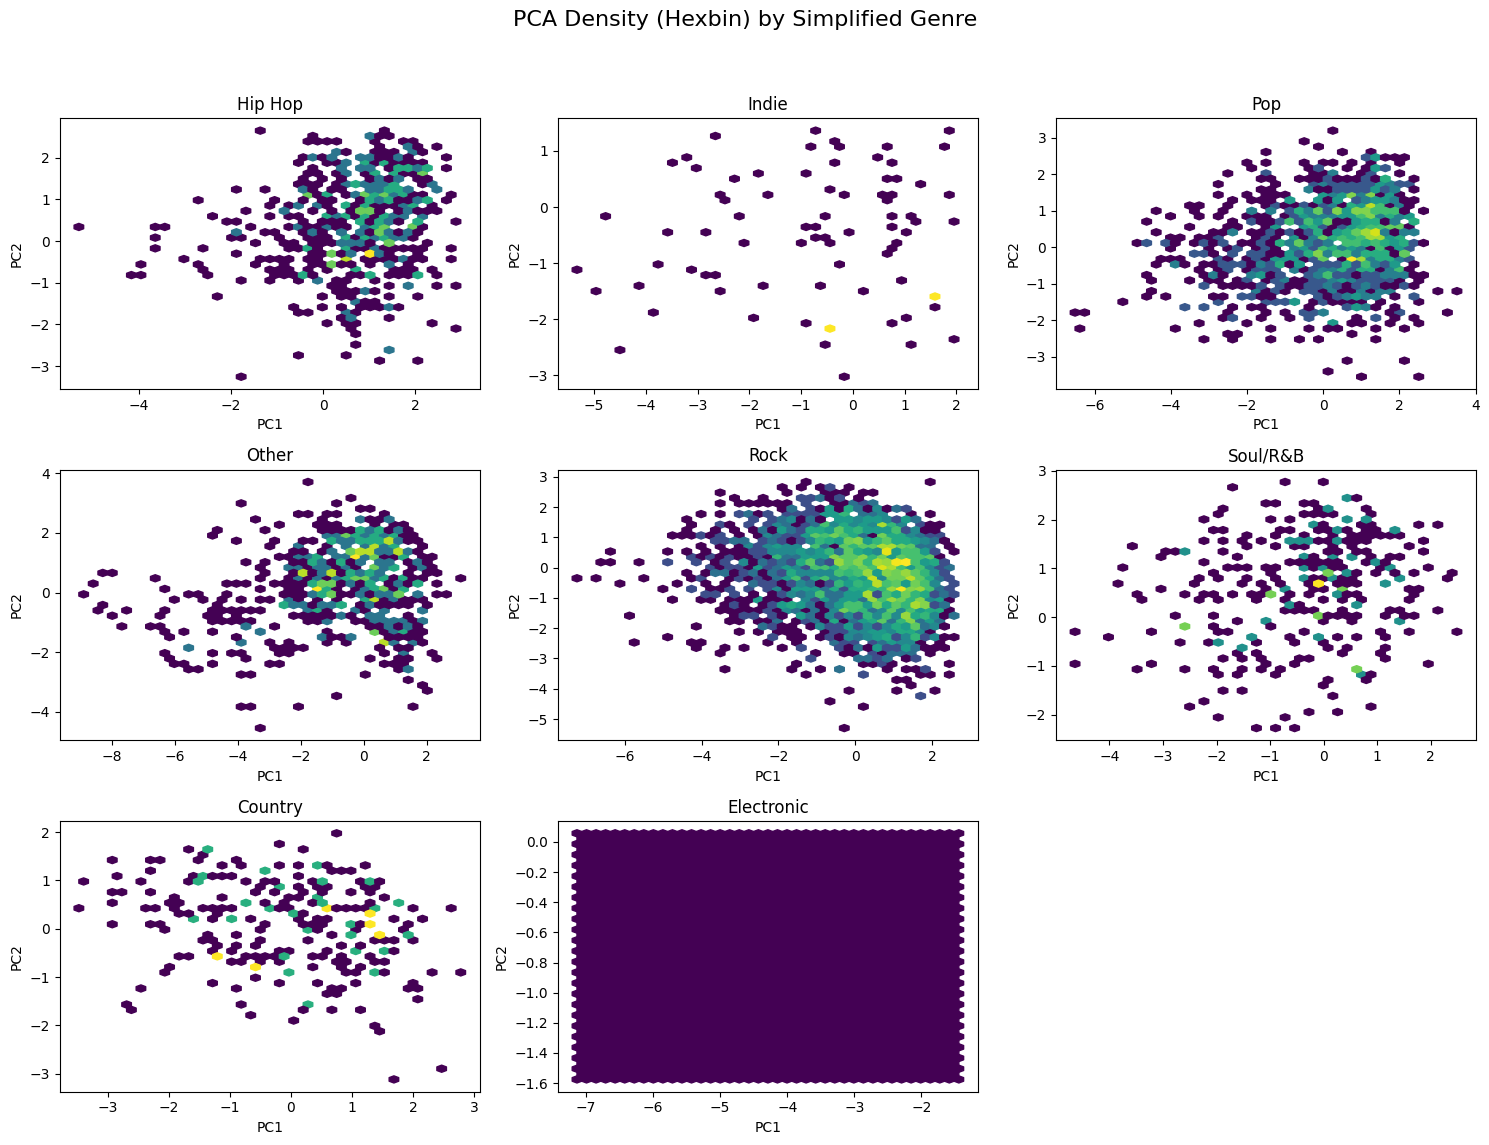

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv('dataset_spotify.csv')

# --- Step 1: Simplify Genre Labels ---
def simplify_genre(genre):
    genre = genre.lower() if isinstance(genre, str) else "Other"
    if 'rock' in genre:
        return 'Rock'
    elif 'pop' in genre:
        return 'Pop'
    elif 'hip hop' in genre or 'rap' in genre:
        return 'Hip Hop'
    elif 'indie' in genre:
        return 'Indie'
    elif 'electronic' in genre or 'edm' in genre:
        return 'Electronic'
    elif 'soul' in genre or 'r&b' in genre:
        return 'Soul/R&B'
    elif 'country' in genre:
        return 'Country'
    else:
        return 'Other'

df['genre_simplified'] = df['genre'].apply(simplify_genre)

# --- Step 2: Feature Selection & Cleaning ---
features = [
    'danceability', 'energy', 'valence', 'tempo', 'liveness',
    'acousticness', 'instrumentalness', 'speechiness', 'loudness'
]

df_clean = df.dropna(subset=features + ['genre_simplified'])

# --- Step 3: PCA Transformation ---
X = df_clean[features]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_clean['PC1'] = components[:, 0]
df_clean['PC2'] = components[:, 1]

# --- Step 4: Hexbin Plot per Genre ---
unique_genres = df_clean['genre_simplified'].unique()
n_genres = len(unique_genres)
n_cols = 3
n_rows = (n_genres + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

for ax, genre in zip(axes.flat, unique_genres):
    subset = df_clean[df_clean['genre_simplified'] == genre]
    hb = ax.hexbin(subset['PC1'], subset['PC2'], gridsize=40, cmap='viridis', bins='log')
    ax.set_title(f'{genre}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

# Hide unused subplots
for ax in axes.flat[n_genres:]:
    ax.set_visible(False)

plt.suptitle('PCA Density (Hexbin) by Simplified Genre', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/tmp/ipykernel_54075/1705509683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = kmeans.fit_predict(X_scaled)


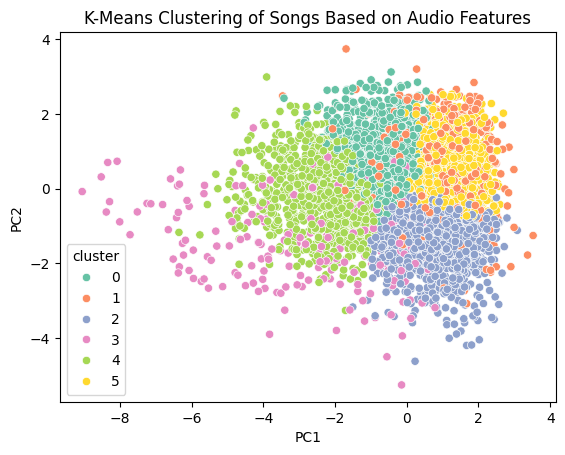

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_clean, palette='Set2')
plt.title('K-Means Clustering of Songs Based on Audio Features')
plt.show()


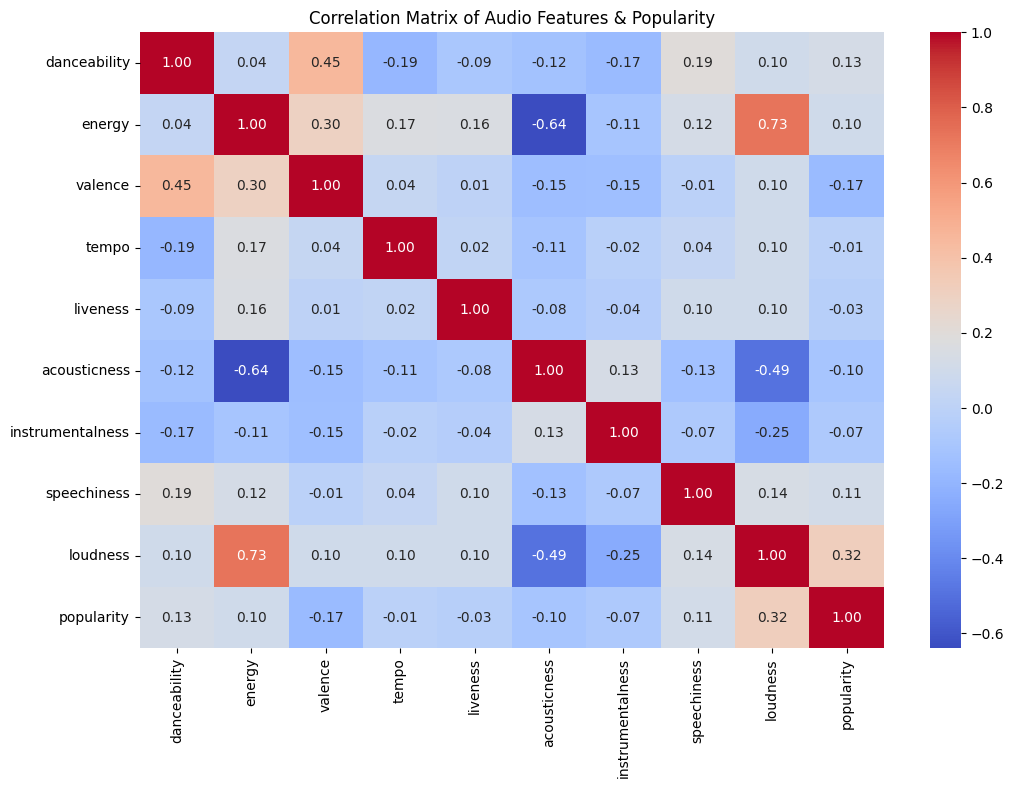

In [4]:
plt.figure(figsize=(12, 8))
corr = df_clean[features + ['popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features & Popularity')
plt.show()


In [10]:
# Count how many songs per genre
genre_counts = df_clean['genre'].value_counts()

# Filter to keep only genres with at least 5 songs
valid_genres = genre_counts[genre_counts >= 5].index
df_filtered = df_clean[df_clean['genre'].isin(valid_genres)]


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_filtered[features]
y = df_filtered['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


                                                                                                                                                                                     precision    recall  f1-score   support

                                                                              acid rock, album rock, alternative rock, classic rock, hard rock, proto-metal, psychedelic rock, rock       0.00      0.00      0.00         2
                                                                                                             acid rock, album rock, classic rock, hard rock, psychedelic rock, rock       0.00      0.00      0.00         4
                                                                              adult standards, brill building pop, folk rock, mellow gold, singer-songwriter, soft rock, yacht rock       0.00      0.00      0.00         1
                                                                                                                   

/home/srivarshitha-m/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/srivarshitha-m/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/srivarshitha-m/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)